In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Imports

# import the needed libs

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import re
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd

plt.ion()   # interactive mode

In [3]:
def AnalysisMetrics(classe_teste, PrevisoesProb, D_Threshold=None, UseYouden=True):

  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False)

  # Calculo da AUC
  auc = round(metrics.roc_auc_score(classe_teste, PrevisoesProb), 3)

  # Dataframe com indice de Youden:
  DataFrameYouden = pd.DataFrame(data={'Threshold':thresholds,'Youden':TPR - FPR, 'TPR':TPR,'FPR':FPR})

  # Dataframe com G-mean:
  DataFrameGmean = pd.DataFrame(data={'Threshold':thresholds,'GMean':np.sqrt(TPR*(1-FPR)),'TPR':TPR,'FPR':FPR})

  # Dataframe com F1-Score:
  DataFrameF1 = pd.DataFrame(data={'Threshold':thresholds,'F1Score':2*TPR*(TPR / (TPR + FPR))/((TPR / (TPR + FPR))+TPR),'TPR':TPR,'FPR':FPR})

  # Dataframe com indices maximos:
  DataFrameGMeanMax = DataFrameGmean.sort_values(by='GMean', ascending = False) # Ordenando em ordem crescente
  DataFrameYoudenMax = DataFrameYouden.sort_values(by='Youden', ascending = False) # Ordenando em ordem crescente
  DataFrameF1Max = DataFrameF1.sort_values(by='F1Score', ascending = False) # Ordenando em ordem crescente

  # Print do valor de threshold que maximiza o índice de Youden:
  # print('\n Melhor Decision Threshold: ', DataFrameYoudenMax.Threshold.values[0]) # printando valor de threshold que maximiza o Youden
  # print('\n Melhor Índice de Youden: ', DataFrameYoudenMax.Youden.values[0]) # printando valor maximo do Youden
  # print('\n Melhor TPR: ', DataFrameYoudenMax.TPR.values[0]) # printando valor maximo do Youden
  # print('\n Melhor FPR: ', DataFrameYoudenMax.FPR.values[0]) # printando valor maximo do Youden

  if D_Threshold==None:

    if UseYouden:
      tpr = round(DataFrameYoudenMax.TPR.values[0], 2)
      fpr = round(DataFrameYoudenMax.FPR.values[0], 2)
      BestThreshold = round(DataFrameYoudenMax.Threshold.values[0], 2)

    else:

      tpr = round(DataFrameF1Max.TPR.values[0], 2)
      fpr = round(DataFrameF1Max.FPR.values[0], 2)
      BestThreshold = round(DataFrameF1Max.Threshold.values[0], 2)

  else:
      BestThreshold=D_Threshold
      predictions = (PrevisoesProb >= BestThreshold).astype(int)

      tn, fp, fn, tp = confusion_matrix(classe_teste, predictions).ravel()
      tpr = round(tp / (tp + fn),2)
      fpr = round(fp / (fp + tn),2)

  predictions = (PrevisoesProb >= BestThreshold).astype(int)
  accuracy = round(np.mean(predictions == classe_teste), 2)
  precision = round(tpr / (tpr + fpr),2)

  f1score = round(2*(precision*tpr)/(precision+tpr),2)

  return auc, tpr, fpr, precision, accuracy, f1score, BestThreshold


In [4]:
#StudyName = 'CancerClassification'
StudyName = 'TissueClassification'

PATH = '/content/gdrive/Shareddrives/IA901 - Projeto Final/Notebooks/FinalResults/{}/'.format(StudyName)

# Criando pasta para salvar resultados finais
if not os.path.exists(PATH+'FinalComparison/'):
  os.mkdir(PATH+'FinalComparison/')

In [5]:
Results_Address = os.listdir(PATH)
Results_Address.remove('FinalComparison') # removendo pasta dos resultados finais
#Results_Address.remove('Experiment_I') # removendo pasta dos resultados finais

for i in Results_Address:
  print(i)
  globals()['Result'+str(i)] = pd.read_csv(PATH+"{}/".format(str(i))+"DL_Prediction.csv")
  globals()['Class'+str(i)] = globals()['Result'+str(i)]['Class'].values
  globals()['Pred'+str(i)] = globals()['Result'+str(i)]['Pred'].values
  globals()['Types'+str(i)] = globals()['Result'+str(i)]['Types'].values

Legendas = ['Baseline (All tissues)', 'Experiment I', 'Experiment II']

Experiment_I
Experiment_II


# Comparações entre estudos e experimentos

Experiment_I
Best Metrics! 

AUC: 0.995, TPR: 0.99, FPR: 0.0, Precision: 1.0, Accuracy: 0.99, F1Score: 0.99, Best Threshold: 0.5
Experiment_II
Best Metrics! 

AUC: 0.995, TPR: 0.99, FPR: 0.0, Precision: 1.0, Accuracy: 0.99, F1Score: 0.99, Best Threshold: 0.5


<ipython-input-3-aff1e0479d6b>:15: RuntimeWarning: invalid value encountered in true_divide
  DataFrameF1 = pd.DataFrame(data={'Threshold':thresholds,'F1Score':2*TPR*(TPR / (TPR + FPR))/((TPR / (TPR + FPR))+TPR),'TPR':TPR,'FPR':FPR})
<ipython-input-3-aff1e0479d6b>:15: RuntimeWarning: invalid value encountered in true_divide
  DataFrameF1 = pd.DataFrame(data={'Threshold':thresholds,'F1Score':2*TPR*(TPR / (TPR + FPR))/((TPR / (TPR + FPR))+TPR),'TPR':TPR,'FPR':FPR})


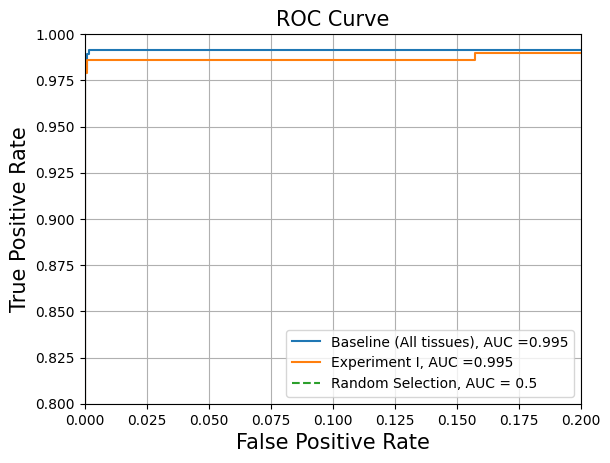

In [22]:
# ROC Curve:

ArbitraryThreshold=0.5

# Plotando ROC Curve com matplotlib:
fig = plt.figure()
ax = fig.add_subplot(111)

MetricsList = []
cont = 0
for i in Results_Address:

  print(i)
  classe_teste = globals()['Class'+str(i)]
  PrevisoesProb = globals()['Pred'+str(i)]

  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False)
  # Calculo da AUC
  auc = metrics.roc_auc_score(classe_teste, PrevisoesProb)
  ax.plot(FPR, TPR, label="{}".format(Legendas[cont])+", AUC ="+np.format_float_positional(auc, precision=3))

  # Best Metrics!
  print('Best Metrics! \n')
  auc, tpr, fpr, precision, accuracy, f1score, BestThreshold  = AnalysisMetrics(classe_teste, PrevisoesProb, D_Threshold=ArbitraryThreshold, UseYouden=False)
  print('AUC: {}, TPR: {}, FPR: {}, Precision: {}, Accuracy: {}, F1Score: {}, Best Threshold: {}'.format(auc, tpr, fpr, precision, accuracy, f1score, BestThreshold))
  MetricsList.append({'Estudo':i, 'AUC':auc, 'TPR':tpr,'FPR':fpr,'Precision':precision,'Accuracy':accuracy, 'F1Score':f1score})

  cont = cont + 1

ax.plot([0,1], [0,1], linestyle='--', label='Random Selection, AUC = 0.5')
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlim(0.0, 0.2)
ax.set_ylim(0.8, 1.0)
ax.set_title('ROC Curve', fontsize=15)
ax.grid()
ax.legend(loc='lower right')
plt.savefig(PATH+'FinalComparison/ROC_GeneralAnalysis.png')
plt.show()

# Metrics

MetricsList = pd.DataFrame(MetricsList)
MetricsList.to_csv(PATH+'FinalComparison/Metrics_GeneralAnalysis.csv', index=False, encoding='utf-8')

In [23]:
print('For a decision threshold={}'.format(ArbitraryThreshold))
MetricsList

For a decision threshold=0.5


,Estudo,AUC,TPR,FPR,Precision,Accuracy,F1Score
0,Experiment_I,0.995,0.99,0.0,1.0,0.99,0.99
1,Experiment_II,0.995,0.99,0.0,1.0,0.99,0.99


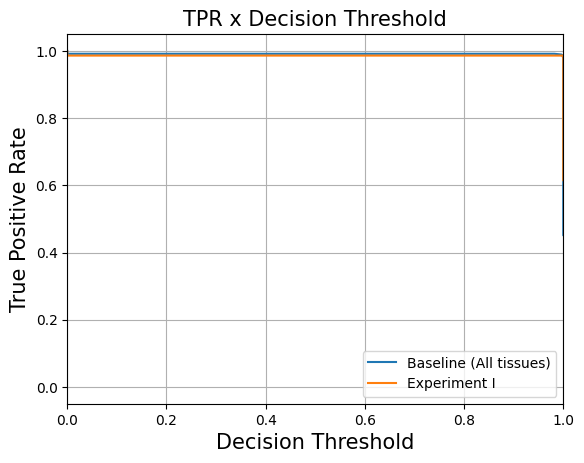

In [12]:
# Gráficos de D. Threshold:

fig = plt.figure()
ax = fig.add_subplot(111)

cont = 0
for i in Results_Address:

  classe_teste = globals()['Class'+str(i)]
  PrevisoesProb = globals()['Pred'+str(i)]
  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False)
  ax.plot(thresholds, TPR, label="{}".format(Legendas[cont]))
  cont = cont + 1


ax.set_xlabel('Decision Threshold', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_title('TPR x Decision Threshold', fontsize=15)
ax.grid()
ax.set_xlim((0,1.0))
ax.legend(loc='lower right')
plt.savefig(PATH+'FinalComparison/TPR_GeneralAnalysis.png')
plt.show()

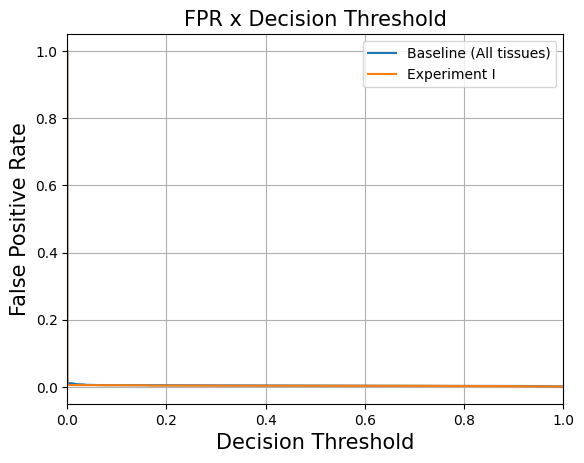

In [13]:
# Gráficos de D. Threshold:

fig = plt.figure()
ax = fig.add_subplot(111)

cont = 0
for i in Results_Address:

  classe_teste = globals()['Class'+str(i)]
  PrevisoesProb = globals()['Pred'+str(i)]
  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False)
  ax.plot(thresholds, FPR, label="{}".format(Legendas[cont]))
  cont = cont + 1


ax.set_xlabel('Decision Threshold', fontsize=15)
ax.set_ylabel('False Positive Rate', fontsize=15)
ax.set_title('FPR x Decision Threshold', fontsize=15)
ax.grid()
ax.legend(loc='upper right')
ax.set_xlim((0,1.0))
plt.savefig(PATH+'FinalComparison/FPR_GeneralAnalysis.png')
plt.show()

# Comparação de performance entre diferentes tecidos

In [ ]:
# ROC Curves para cada tecido:
Experiment_Name = 'Experiment_II'

TissueTypes = np.unique(globals()['Types'+str(Experiment_Name)])

cont = 0
AUCList = []
for i in TissueTypes:

  classe_teste = globals()['Result'+str(Experiment_Name)][globals()['Result'+str(Experiment_Name)].Types==i]['Class'].values
  PrevisoesProb = globals()['Result'+str(Experiment_Name)][globals()['Result'+str(Experiment_Name)].Types==i]['Pred'].values
  auc = metrics.roc_auc_score(classe_teste, PrevisoesProb)
  auc, tpr, fpr, precision, accuracy, f1score, BestThreshold  = AnalysisMetrics(classe_teste, PrevisoesProb, D_Threshold=0.22, UseYouden=False)

  AUCList.append({'N. amostras':len(classe_teste), 'Types':i, 'AUC':auc, 'TPR':tpr,'FPR':fpr,'Precision':precision,'Accuracy':accuracy,'F1-Score':f1score})
  #FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False)
  # Calculo da AUC

  #ax.plot(FPR, TPR, label="{}".format(i)+", AUC ="+np.format_float_positional(auc, precision=3))
  cont = cont + 1

DataFrameAUCList = pd.DataFrame(AUCList)
DataFrameAUCList = DataFrameAUCList.sort_values(by='AUC', ascending = False) # Ordenando em ordem crescente
SelectedTissues = np.concatenate((DataFrameAUCList['Types'].head(3).values, DataFrameAUCList['Types'].tail(3).values), axis=0)

# Plotando ROC Curve com matplotlib:
fig = plt.figure()
ax = fig.add_subplot(111)

cont = 0
for i in SelectedTissues:

  # Plot do Baseline
  if cont==0:
    FPR, TPR, thresholds = metrics.roc_curve(globals()['Result'+str(Experiment_Name)]['Class'].values, globals()['Result'+str(Experiment_Name)]['Pred'].values, drop_intermediate=False)
    auc = metrics.roc_auc_score(globals()['Result'+str(Experiment_Name)]['Class'].values, globals()['Result'+str(Experiment_Name)]['Pred'].values)
    # Calculo da AUC
    ax.plot(FPR, TPR, label="All tissues"+", AUC ="+np.format_float_positional(auc, precision=3))

  classe_teste = globals()['Result'+str(Experiment_Name)][globals()['Result'+str(Experiment_Name)].Types==i]['Class'].values
  PrevisoesProb = globals()['Result'+str(Experiment_Name)][globals()['Result'+str(Experiment_Name)].Types==i]['Pred'].values
  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False)
  # Calculo da AUC
  auc = metrics.roc_auc_score(classe_teste, PrevisoesProb)

  # Plot
  ax.plot(FPR, TPR, label="{}".format(i)+", AUC ="+np.format_float_positional(auc, precision=3))

  cont = cont + 1

ax.plot([0,1], [0,1], linestyle='--', label='Random Selection, AUC = 0.5')
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_title('ROC Curve'.format(Experiment_Name), fontsize=15)
ax.grid()
ax.legend(title='{}'.format(Experiment_Name), loc='lower right')
plt.savefig(PATH+'FinalComparison/ROC_TissueAnalysis.png')
plt.show()


In [34]:
# Lista completa de Tecidos e respectivas AUCs:
DataFrameAUCList.to_csv(PATH+'FinalComparison/Metrics_TissueAnalysis_{}.csv'.format(Experiment_Name), index=False, encoding='utf-8')
DataFrameAUCList

,N. amostras,Types,AUC,TPR,FPR,Precision,Accuracy,F1-Score
2,29,Bladder,1.000,1.00,0.24,0.81,0.86,0.90
15,29,Stomach,0.985,0.94,0.00,1.00,0.97,0.97
3,470,Breast,0.980,0.96,0.16,0.86,0.91,0.91
13,35,Prostate,0.962,0.91,0.15,0.86,0.89,0.88
4,58,Cervix,0.931,0.98,0.29,0.77,0.90,0.86
6,84,Esophagus,0.911,0.94,0.42,0.69,0.79,0.80
7,76,HeadNeck,0.910,0.92,0.32,0.74,0.79,0.82
11,29,Ovarian,0.907,1.00,0.92,0.52,0.62,0.68
10,36,Lung,0.886,0.97,1.00,0.49,0.94,0.65
16,39,Testis,0.856,0.86,0.59,0.59,0.67,0.70
